In [2]:
# import libraries 
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage import feature
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords


In [3]:
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense
from tensorflow.keras.models import Model

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
spotify_path = '/content/gdrive/MyDrive/0. Tensorflow/spotify_songs.csv'

In [6]:
# import data 
df = pd.read_csv(spotify_path)

# check data
df.head()

,track_id,track_name,track_artist,lyrics,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,language
0,0017A6SJgTbfQVU2EtsPNo,Pangarap,Barbie's Cradle,Minsan pa Nang ako'y napalingon Hindi ko alam ...,41,1srJQ0njEQgd8w4XSqI4JQ,Trip,2001-01-01,Pinoy Classic Rock,37i9dQZF1DWYDQ8wBxd7xt,...,-10.068,1,0.0236,0.27900,0.01170,0.0887,0.566,97.091,235440,tl
1,004s3t0ONYlzxII9PLgU6z,I Feel Alive,Steady Rollin,"The trees, are singing in the wind The sky blu...",28,3z04Lb9Dsilqw68SHt6jLB,Love & Loss,2017-11-21,Hard Rock Workout,3YouF0u7waJnolytf9JCXf,...,-4.739,1,0.0442,0.01170,0.00994,0.3470,0.404,135.225,373512,en
2,00chLpzhgVjxs1zKC9UScL,Poison,Bell Biv DeVoe,"NA Yeah, Spyderman and Freeze in full effect U...",0,6oZ6brjB8x3GoeSYdwJdPc,Gold,2005-01-01,"Back in the day - R&B, New Jack Swing, Swingbe...",3a9y4eeCJRmG9p4YKfqYIx,...,-7.504,0,0.2160,0.00432,0.00723,0.4890,0.650,111.904,262467,en
3,00cqd6ZsSkLZqGMlQCR0Zo,Baby It's Cold Outside (feat. Christina Aguilera),CeeLo Green,I really can't stay Baby it's cold outside I'v...,41,3ssspRe42CXkhPxdc12xcp,CeeLo's Magic Moment,2012-10-29,Christmas Soul,6FZYc2BvF7tColxO8PBShV,...,-5.819,0,0.0341,0.68900,0.00000,0.0664,0.405,118.593,243067,en
4,00emjlCv9azBN0fzuuyLqy,Dumb Litty,KARD,Get up out of my business You don't keep me fr...,65,7h5X3xhh3peIK9Y0qI5hbK,KARD 2nd Digital Single ‘Dumb Litty’,2019-09-22,K-Party Dance Mix,37i9dQZF1DX4RDXswvP6Mj,...,-1.993,1,0.0409,0.03700,0.00000,0.1380,0.240,130.018,193160,en


In [ ]:
df.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,18454.000000,18454.000000,18454.000000,18454.000000,18454.000000,18454.000000,18454.000000,18454.000000,18454.000000,18454.000000,18454.000000,18454.000000,18454.000000
mean,42.438821,0.644066,0.692289,5.342094,-6.769159,0.580525,0.106192,0.175348,0.051216,0.189593,0.520598,120.812167,230319.306763
std,24.616740,0.150071,0.180635,3.613121,2.920757,0.493487,0.102291,0.217795,0.168263,0.153751,0.228716,27.586424,57255.086685
min,0.000000,0.098500,0.016700,0.000000,-34.283000,0.000000,0.022400,0.000001,0.000000,0.009360,0.000010,37.114000,31893.000000
25%,24.000000,0.546000,0.573000,2.000000,-8.249000,0.000000,0.039700,0.016100,0.000000,0.092700,0.345000,98.856000,193230.250000
50%,48.000000,0.660000,0.715000,6.000000,-6.227000,1.000000,0.060300,0.081900,0.000009,0.128000,0.522000,120.045000,221340.000000
75%,62.000000,0.755000,0.835000,9.000000,-4.719000,1.000000,0.130000,0.254000,0.001720,0.246000,0.700000,135.984000,258078.250000
max,100.000000,0.979000,1.000000,11.000000,1.275000,1.000000,0.918000,0.992000,0.987000,0.996000,0.991000,214.047000,517810.000000


In [ ]:
df.shape, df.columns, df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18454 entries, 0 to 18453
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  18454 non-null  object 
 1   track_name                18454 non-null  object 
 2   track_artist              18454 non-null  object 
 3   lyrics                    18194 non-null  object 
 4   track_popularity          18454 non-null  int64  
 5   track_album_id            18454 non-null  object 
 6   track_album_name          18454 non-null  object 
 7   track_album_release_date  18454 non-null  object 
 8   playlist_name             18454 non-null  object 
 9   playlist_id               18454 non-null  object 
 10  playlist_genre            18454 non-null  object 
 11  playlist_subgenre         18454 non-null  object 
 12  danceability              18454 non-null  float64
 13  energy                    18454 non-null  float64
 14  key   

((18454, 25),
 Index(['track_id', 'track_name', 'track_artist', 'lyrics', 'track_popularity',
        'track_album_id', 'track_album_name', 'track_album_release_date',
        'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
        'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
        'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
        'duration_ms', 'language'],
       dtype='object'),
 None)

In [7]:
# subset data for english lyrics only 
df = df[df['language'] == 'en']

In [8]:
df = df.dropna(subset=['lyrics'])

In [25]:
# Sort DataFrame by track_popularity in descending order
df_sorted = df.sort_values(by='track_popularity', ascending=False)

# Take the top 100 rows
top_songs = df_sorted.head(100)

In [26]:
import nltk
import string
from nltk.corpus import stopwords

# Download stopwords
nltk.download('stopwords')

def clean_text(text):
    text = text.lower()
    text = ''.join([word for word in text if word not in string.punctuation])
    text = text.split()
    text = [word for word in text if word not in stopwords.words('english')]
    return text

top_songs['lyrics'] = top_songs['lyrics'].apply(lambda x: clean_text(x))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-26-2fdfd2ee4319>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_songs['lyrics'] = top_songs['lyrics'].apply(lambda x: clean_text(x))


In [27]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(top_songs['lyrics'])
total_words = len(tokenizer.word_index) + 1


In [28]:
input_sequences = []
for line in top_songs['lyrics']:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)


In [29]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))


In [30]:
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]


In [31]:
from tensorflow.keras.utils import to_categorical

label = to_categorical(label, num_classes=total_words)


In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers



In [33]:
model = Sequential()

# Add an Embedding layer
model.add(Embedding(total_words, 100, input_length=max_sequence_len - 1))

# Add LSTM layers
model.add(Bidirectional(LSTM(150, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(100, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(150)))

# Add a Dense output layer
model.add(Dense(total_words, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(lr=0.01), 
              metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 3163, 100)         324400    
                                                                 
 bidirectional_6 (Bidirectio  (None, 3163, 300)        301200    
 nal)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 3163, 300)         0         
                                                                 
 bidirectional_7 (Bidirectio  (None, 3163, 200)        320800    
 nal)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 3163, 200)         0         
                                                                 
 bidirectional_8 (Bidirectio  (None, 300)             

In [34]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# Define the path to save the model
model_path = "/content/gdrive/MyDrive/0. Tensorflow/lyrics_generator_model.h5"

# Define checkpoint callback
checkpoint = ModelCheckpoint(model_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

# Define early stopping callback
earlystop = EarlyStopping(monitor='val_loss', patience=8, verbose=1, mode='min')

callbacks_list = [checkpoint, earlystop]


In [35]:
# Fit the model
history = model.fit(predictors, label, 
                    epochs=10, 
                    verbose=1, 
                    callbacks=callbacks_list, 
                    validation_split=0.2)


Epoch 1/10
2525/2525 [==============================] - ETA: 0s - loss: 6.2659 - accuracy: 0.0482
Epoch 1: val_loss improved from inf to 7.92674, saving model to /content/gdrive/MyDrive/0. Tensorflow/lyrics_generator_model.h5
2525/2525 [==============================] - 1716s 676ms/step - loss: 6.2659 - accuracy: 0.0482 - val_loss: 7.9267 - val_accuracy: 0.0216
Epoch 2/10
2525/2525 [==============================] - ETA: 0s - loss: 4.7226 - accuracy: 0.1765
Epoch 2: val_loss did not improve from 7.92674
2525/2525 [==============================] - 1626s 644ms/step - loss: 4.7226 - accuracy: 0.1765 - val_loss: 8.6742 - val_accuracy: 0.0186
Epoch 3/10
2525/2525 [==============================] - ETA: 0s - loss: 3.3398 - accuracy: 0.3679
Epoch 3: val_loss did not improve from 7.92674
2525/2525 [==============================] - 1620s 642ms/step - loss: 3.3398 - accuracy: 0.3679 - val_loss: 9.5691 - val_accuracy: 0.0184
Epoch 4/10
2525/2525 [==============================] - ETA: 0s - loss

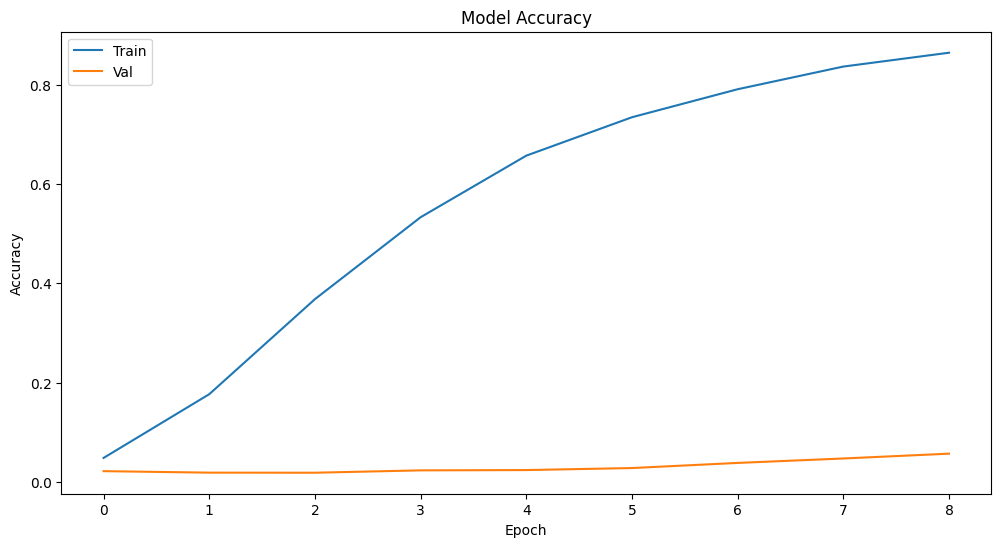

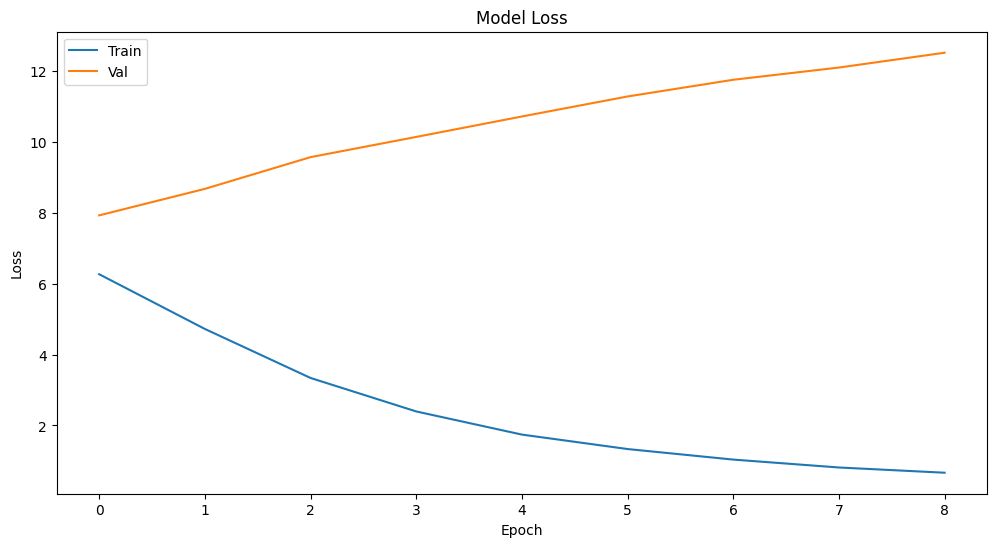

In [36]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


In [37]:
def generate_text(seed_text, next_words, model, max_sequence_len):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted_probs = model.predict(token_list, verbose=0)
        
        # get the index of the highest predicted probability
        predicted = np.argmax(predicted_probs, axis=-1)
        
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        seed_text += " " + output_word
    return seed_text


In [69]:
print(generate_text("Hello", 10, model, max_sequence_len))

Hello thing thinking take molly ooh uh im molly feel savage


In [53]:
print(generate_text("Data science is great", 20, model, max_sequence_len))

Data science is great state might im enough im back classy oh im feel come without rippin would would knew said would go said


In [54]:
print(generate_text("I love deep learning", 20, model, max_sequence_len))

I love deep learning bad one change oh cause im making feel like im im im im ayy im show back find never ayy


In [67]:
print(generate_text("I love Natural language processing", 20, model, max_sequence_len))

I love Natural language processing tiffanys gas oh even hate brain bout point lets go ya think say im gonna let said happened know know


In [64]:
print(generate_text("My model ran for very long", 20, model, max_sequence_len))

My model ran for very long lot things nothin let feel like lost never underneath id known storm weather go something couldve said make stop hurting


In [65]:
print(generate_text("I even had to pay for Colab pro", 20, model, max_sequence_len))

I even had to pay for Colab pro im enough good times love way fast never tears oh im diggin deeper wont stop til get good way better


In [66]:
print(generate_text("But the result was not good", 20, model, max_sequence_len))

But the result was not good thing body ill take run lets got yummyyum feel like im yeah yeah im like yeah yeah block made feel


In [70]:
print(generate_text("Very sad", 15, model, max_sequence_len))

Very sad crack things hate find way better im im whole want dont know hard like know
